In [ ]:
from outliers import smirnov_grubbs as grubbs
import pandas as pd
import numpy as np
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt
import matplotlib.collections as clt
import matplotlib.gridspec as gridspec
%matplotlib inline
from jupyterthemes import jtplot

In [ ]:
#Extract significant fiber estimates
def get_sigFibers(psig_list, fibers, cogdf,outputdf):
    psig_listdf=pd.read_csv('/data/dataDB/WIN_Matters/analysis/data/'+psig_list)
    df=pd.read_csv('/data/dataDB/WIN_Matters/analysis/data/'+fibers, index_col=0)
    cogFactors=pd.read_csv('/data/dataDB/WIN_Matters/analysis/data/'+cogdf, index_col=0)
    #make a list of only fibers that were significantly associated with PC variable and were in the directionality that matched with dsi studio output
    L=list(psig_listdf['Fiber_name'])
    #use the significant fibers for cogfactors analysis
    sig_only=df[L]
    #get mean fiber measure
    sig_only['fiberMean']=sig_only.mean(axis=1)
    #now merge with existing cogfactors db
    df_final=pd.merge(sig_only, cogFactors, on='sub_id')
    df_final.to_csv('/data/dataDB/WIN_Matters/analysis/data/'+outputdf)

#PC1 greater
get_sigFibers('PC1_great_sigOnly_fibers_list.csv','PC1_greater_fibers_wmask.csv',
              'cogFactors01232019.csv','PC1_greater_sigOnly_fibers.csv')
#PC1 lesser
get_sigFibers('PC1_less_sigOnly_fibers_list.csv','PC1_lesser_fibers_wmask.csv',
              'cogFactors01232019.csv','PC1_lesser_sigOnly_fibers.csv')

#PC2 greater
get_sigFibers('PC2_great_sigOnly_fibers_list.csv','PC2_greater_fibers_wmask.csv',
              'cogFactors01232019.csv','PC2_greater_sigOnly_fibers.csv')
#PC2 lesser
get_sigFibers('PC2_less_sigOnly_fibers_list.csv','PC2_lesser_fibers_wmask.csv',
              'cogFactors01232019.csv','PC2_lesser_sigOnly_fibers.csv')

#Grubbs to remove outliers
PC1_great=pd.read_csv('/data/dataDB/WIN_Matter/analysis/data/PC1_greater_sigOnly_fibers.csv')
PC1_less= pd.read_csv('/data/dataDB/WIN_Matter/analysis/data/PC1_lesser_sigOnly_fibers.csv')
PC2_great= pd.read_csv('/data/dataDB/WIN_Matter/analysis/data/PC2_greater_sigOnly_fibers.csv')
PC2_less= pd.read_csv('/data/dataDB/WIN_Matter/analysis/data/PC2_lesser_sigOnly_fibers.csv')

def grubbhub(data, savename='filename'):
    scrubdata=pd.DataFrame(data=data['sub_id'], columns=['sub_id'])
    scrubdata['tx_code']=data['tx_code']
    scrubdata['Age']=grubbs.test(data['Age'], alpha=0.05)
    scrubdata['Sex']=grubbs.test(data['Sex'], alpha=0.05)
    scrubdata['deltaFD']=grubbs.test(data['deltaFD'], alpha=0.05)
    scrubdata['IGT_p_diff']=grubbs.test(data['IGT_p_diff'], alpha=0.05)
    scrubdata['IGT_q_diff']=grubbs.test(data['IGT_q_diff'], alpha=0.05)
    scrubdata['TS_RT_diff']=grubbs.test(data['TS_RT_diff'], alpha=0.05)
    scrubdata['TS_ACC_diff']=grubbs.test(data['TS_ACC_diff'], alpha=0.05)
    scrubdata['stroop_int_diff']=grubbs.test(data['stroop_int_diff'], alpha=0.05)
    scrubdata['stroop_fac_diff']=grubbs.test(data['stroop_fac_diff'], alpha=0.05)
    scrubdata['nback_RT_diff']=grubbs.test(data['nback_RT_diff'], alpha=0.05)
    scrubdata['nback_ACC_diff']=grubbs.test(data['nback_ACC_diff'], alpha=0.05)
    scrubdata['PC1']=grubbs.test(data['PC1'], alpha=0.05)
    scrubdata['PC2']=grubbs.test(data['PC2'], alpha=0.05)
    scrubdata['PC3']=grubbs.test(data['PC3'], alpha=0.05)
    scrubdata['fiberMean']=grubbs.test(data['fiberMean'], alpha=0.05)
    scrubdata.to_csv('/data/dataDB/WIN_Matter/analysis/data/'+savename+ '_grubbs.csv', index=False)
grubbhub(PC1_great, 'PC1_greater_sigOnly_fibers')
grubbhub(PC1_less, 'PC1_lesser_sigOnly_fibers')
grubbhub(PC2_great, 'PC2_greater_sigOnly_fibers')
grubbhub(PC2_less, 'PC2_lesser_sigOnly_fibers'

In [1]:
#Figure 1. Distribution of health parameters
df= pd.read_csv('~/Google Drive/WIN_Matter/analysis/data/health_demographics_diffscores.csv')

df.rename(columns={"waistIliac": "W2H", "DXA_Tissue": "DXA Tissue","DXA_Region": "DXA Region", "VO2LMin":"VO2 L/Min", "VO2mlkgmin":"VO2 mL/kg/Min"}, inplace=True)
df.replace({'Sex': {0: 'Male', 1:'Female'}}, inplace=True)

#Subset df's to make a countplot with different color schemes
DIET_df=df.loc[df['Group'] == 'DIET']
MOD_df=df.loc[df['Group'] == 'MOD-PA']
HIGH_df=df.loc[df['Group'] == 'HIGH-PA']

#Create figure space
fig=plt.figure(figsize=(20,20), constrained_layout=True)
#Add grid space for subplots 3 rows by 4 columns
#gs=fig.add_gridspec(3,4)

gs = gridspec.GridSpec(nrows=2, ncols=4)
#DXA Tissue
ax1=fig.add_subplot(gs[0,0])
dx="Group"; dy="DXA Tissue"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax1)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ DXA$_{Tissue}$', fontsize=30, pad=12)
plt.ylabel('')
ax.set(xlabel=' ')
#DXA Region
ax2=fig.add_subplot(gs[0,1], sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
dx="Group"; dy="DXA Region"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax2)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ DXA$_{Region}$', fontsize=30, pad=12)
ax.set(ylabel=' ')
ax.set(xlabel=' ')


#VO2 Lmin
ax3=fig.add_subplot(gs[0,2], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
dx="Group"; dy="VO2 L/Min"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, figsize = (7,5), alpha = .6, orient='h', dodge = True, ax=ax3)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ VO2$_{L/Min}$', fontsize=30, pad=12)
ax.set(ylabel=' ')
ax.set(xlabel=' ')

#VO2mlkgmin
ax4=fig.add_subplot(gs[0,3], sharey=ax1)
plt.setp(ax4.get_yticklabels(), visible=False)
dx="Group"; dy="VO2 mL/kg/Min"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, figsize = (7,5), alpha = .6, orient='h', dodge = True, ax=ax4)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ VO2$_{mL/kg/Min}$', fontsize=30, pad=12)
ax.set(ylabel=' ')
ax.set(xlabel=' ')
#FD
ax5=fig.add_subplot(gs[1,0])
dx="Group"; dy="FD"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, figsize = (7,5), alpha = .6, orient='h', dodge = True, ax=ax5)
ax.tick_params(labelsize=15)
plt.ylabel('')
ax.set_title('$\Delta$ FD', fontsize=30, pad=12)
ax.set(xlabel=' ')
#Weight
ax6=fig.add_subplot(gs[1,1], sharey=ax5)
plt.setp(ax6.get_yticklabels(), visible=False)
dx="Group"; dy="Weight"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, figsize = (7,5), alpha = .6, orient='h', dodge = True, ax=ax6)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ Weight$_{(kg)}$', fontsize=30, pad=12)
ax.set(ylabel=' ')
ax.set(xlabel=' ')
#BMI
ax7=fig.add_subplot(gs[1,2], sharey=ax5)
plt.setp(ax7.get_yticklabels(), visible=False)
dx="Group"; dy="BMI"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, figsize = (7,5), alpha = .6, orient='h', dodge = True, ax=ax7)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ BMI', fontsize=30, pad=12)
ax.set(ylabel=' ')
ax.set(xlabel=' ')
#W2H
ax8=fig.add_subplot(gs[1,3], sharey=ax5)
plt.setp(ax8.get_yticklabels(), visible=False)
dx="Group"; dy="W2H"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, figsize = (7,5), alpha = .6, orient='h', dodge = True, ax=ax8)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ W2H', fontsize=30, pad=12)
ax.set(ylabel=' ')
ax.set(xlabel=' ')

#plt.savefig('/Users/aporter1350/Google Drive/WIN_Matter/analysis/output/images/Health_Raincloud_Plots/condensedPlot_healthOnly.png', bbox_inches='tight')



[Text(0.5, 0, ' ')]

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "


/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2314: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called Gri

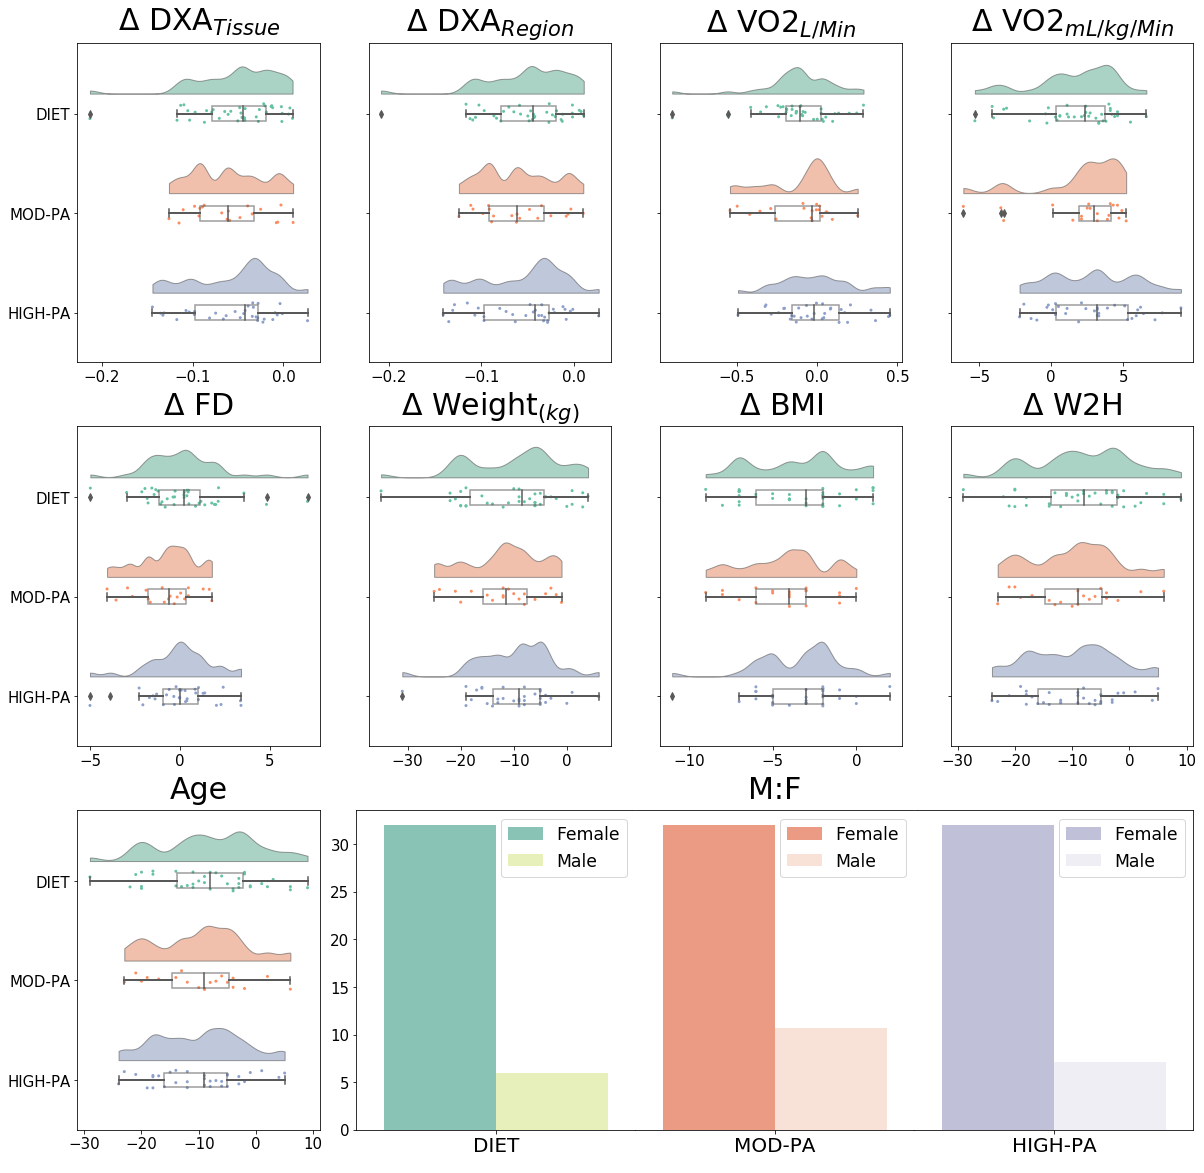

In [2]:
#If including Sex and Age
#Create figure space
fig=plt.figure(figsize=(20,20), constrained_layout=True)
#Add grid space for subplots 3 rows by 4 columns
#gs=fig.add_gridspec(3,4)

gs = gridspec.GridSpec(nrows=3, ncols=4)
#DXA Tissue
ax1=fig.add_subplot(gs[0,0])
dx="Group"; dy="DXA Tissue"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax1)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ DXA$_{Tissue}$', fontsize=30, pad=12)
plt.ylabel('')
ax.set(xlabel=' ')
#DXA Region
ax2=fig.add_subplot(gs[0,1], sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
dx="Group"; dy="DXA Region"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax2)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ DXA$_{Region}$', fontsize=30, pad=12)
ax.set(ylabel=' ')
ax.set(xlabel=' ')


#VO2 Lmin
ax3=fig.add_subplot(gs[0,2], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
dx="Group"; dy="VO2 L/Min"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, figsize = (7,5), alpha = .6, orient='h', dodge = True, ax=ax3)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ VO2$_{L/Min}$', fontsize=30, pad=12)
ax.set(ylabel=' ')
ax.set(xlabel=' ')

#VO2mlkgmin
ax4=fig.add_subplot(gs[0,3], sharey=ax1)
plt.setp(ax4.get_yticklabels(), visible=False)
dx="Group"; dy="VO2 mL/kg/Min"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, figsize = (7,5), alpha = .6, orient='h', dodge = True, ax=ax4)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ VO2$_{mL/kg/Min}$', fontsize=30, pad=12)
ax.set(ylabel=' ')
ax.set(xlabel=' ')
#FD
ax5=fig.add_subplot(gs[1,0])
dx="Group"; dy="FD"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, figsize = (7,5), alpha = .6, orient='h', dodge = True, ax=ax5)
ax.tick_params(labelsize=15)
plt.ylabel('')
ax.set_title('$\Delta$ FD', fontsize=30, pad=12)
ax.set(xlabel=' ')
#Weight
ax6=fig.add_subplot(gs[1,1], sharey=ax5)
plt.setp(ax6.get_yticklabels(), visible=False)
dx="Group"; dy="Weight"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, figsize = (7,5), alpha = .6, orient='h', dodge = True, ax=ax6)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ Weight$_{(kg)}$', fontsize=30, pad=12)
ax.set(ylabel=' ')
ax.set(xlabel=' ')
#BMI
ax7=fig.add_subplot(gs[1,2], sharey=ax5)
plt.setp(ax7.get_yticklabels(), visible=False)
dx="Group"; dy="BMI"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, figsize = (7,5), alpha = .6, orient='h', dodge = True, ax=ax7)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ BMI', fontsize=30, pad=12)
ax.set(ylabel=' ')
ax.set(xlabel=' ')
#W2H
ax8=fig.add_subplot(gs[1,3], sharey=ax5)
plt.setp(ax8.get_yticklabels(), visible=False)
dx="Group"; dy="W2H"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, figsize = (7,5), alpha = .6, orient='h', dodge = True, ax=ax8)
ax.tick_params(labelsize=15)
ax.set_title('$\Delta$ W2H', fontsize=30, pad=12)
ax.set(ylabel=' ')
ax.set(xlabel=' ')
#Age
ax9=fig.add_subplot(gs[2,0])
dx="Group"; dy="W2H"; dhue="Group"; ort = "h"; pal = "Set2"; sigma = .2
ax=pt.RainCloud(x=dx, y = dy, data = df, bw = sigma,
                 width_viol = .7, figsize = (7,5), alpha = .6, orient='h', dodge = True, ax=ax9)
ax.tick_params(labelsize=15)
plt.ylabel('')
ax.set_title('Age', fontsize=30, pad=12)
ax.set(xlabel=' ')

#Gender
gs2 = gridspec.GridSpec(nrows=3, ncols=4, wspace=0)
ax10=fig.add_subplot(gs2[2,1])
ax = sns.countplot(x='Group', hue='Sex', data=DIET_df, palette= ["#7fcdbb", "#edf8b1"], ax=ax10)
ax.set_ylabel(ylabel='')
ax.set_xlabel(xlabel='')
ax.tick_params(axis='x',labelsize=20)
ax.tick_params(axis='y',labelsize=15)
ax.spines["right"].set_visible(False)
ax.legend(fontsize='xx-large')



ax11=fig.add_subplot(gs2[2,2])
ax1=sns.countplot(x='Group', hue='Sex', data=MOD_df, palette=["#fc9272", "#fee0d2"], ax=ax11)
ax1.set_title("M:F",fontsize=30, pad=12)
ax1.set(yticklabels=[])
ax1.set_yticks([])
ax1.set(ylabel=' ')
ax1.set_xlabel(xlabel='')
ax1.tick_params(labelsize=20)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.legend(fontsize='xx-large')


ax12=fig.add_subplot(gs2[2,3])
ax2=sns.countplot(x='Group', hue='Sex', data=HIGH_df, palette=["#bcbddc", "#efedf5"], ax=ax12)
ax2.set(yticklabels=[])
ax2.set(ylabel=' ')
ax2.set_xlabel(xlabel='')
ax2.tick_params(labelsize=20)
ax2.set_yticks([])
ax2.spines["left"].set_visible(False)
ax2.legend(fontsize='xx-large')




#plt.savefig('/Users/aporter1350/Google Drive/WIN_Matter/analysis/output/images/Health_Raincloud_Plots/condensedPlot.png', bbox_inches='tight')



In [ ]:
#Figure 2. PCA
pc_load=pd.read_csv('~/Google Drive/WIN_Matter/analysis/data/WINPCload.csv')
pc_var=pd.read_csv('~/Google Drive/WIN_Matter/analysis/data/WINPCpercentvar.csv')
#inverse PC1 so all variables are negative 
pc_load['Loading(corr)'] = pc_load['Loading(corr)'].mask(pc_load['PC Variables'] == 1, pc_load['Loading(corr)'] * (-1))
pc_load['Loading(corr)'] = pc_load['Loading(corr)'].mask(pc_load['PC Variables'] == 3, pc_load['Loading(corr)'] * (-1))

#Create figure space
fig=plt.figure(figsize=(25,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 2 columns
gs=gridspec.GridSpec(1,2, figure=fig)
               
               
ax1=fig.add_subplot(gs[0,0])
#setting up colors for each health variable
#PC1: blue
#PC2: purple
#PC3: light purple
#PC4-6: green
pc=pc_var.PC.unique().tolist()
pc_colors=["#236AB9","#5A18C9", "#66B032", "#92B6C4", "#92B6C4", "#92B6C4"]
pc_dict=dict(zip(pc, pc_colors))
sns.set_context=("talk")
plt.ylim(0, 100)
ax1=sns.barplot(x="PC", y="var", data=pc_var, palette=pc_dict, ax=ax1)
ax1.set_xlabel('Principle Component Variables', fontsize=40)
ax1.set_ylabel("Cumulative Variance Explained(%)",fontsize=40)
ax1.tick_params(labelsize=20)
plt.yticks([0, 25, 50, 75, 100])
plt.axhline(95, linestyle ='--')

ax2=fig.add_subplot(gs[0,1])
health=pc_load.HealthVariables.unique().tolist()
health_colors=["#609CE1","#236AB9","#133863","#9BD770", "#66B032","#5A18C9","#905BEC"]
color_dict=dict(zip(health, health_colors))
sns.set_context=('talk')
plt.ylim(-1, 1)
ax2=sns.barplot(x="PC Variables", y="Loading(corr)", hue="HealthVariables", data=pc_load, palette=color_dict, ax=ax2)
plt.legend(fontsize='xx-large')
ax2.set_ylabel("Loading(corr)",fontsize=40)
ax2.set_xlabel("Principle Component Variables", fontsize=40)
ax2.tick_params(labelsize=20)
#plt.savefig("/Users/aporter1350/Google Drive/WIN_Matter/analysis/output/images/PCA_variance_Distribution/pcBarplots_inversePC.png", dpi=100, bbox_inches='tight')               
               

In [ ]:
#Figure 4. Frequency 
def calc_freq(pc_val='PC1', direction='greater', pathways='/which/path'):
    #pc
    pc=pd.read_csv('/Users/aporter1350/Google Drive/WIN_Matter/connectometry/output/'+pc_val+'/region_tracking/'+pc_val+'_'+direction+'_AAL65_cg_edited.txt', sep='\t')
    #pc=pd.read_csv(pc_path, sep='\t')
    #path
    path=pd.read_csv('/Users/aporter1350/Google Drive/WIN_Matter/connectometry/output/'+pathways+'.txt', sep='\t', header=2, index_col=2)
    #path=pd.read_csv(pathways, sep='\t', header=2, index_col=2)
    #drop first 2 columns
    path.drop([path.columns[0], path.columns[1]], axis='columns', inplace=True)
    #iterate through the pathway matrix and add one for every nonzero entity, calculating the total count of possible values
    i=0
    #iterate through the pc matrix and add one for every nonzero entitiy that exists for every nonzero that exists in pathway matrix
    j=0
    colnames=list(path.columns)
    for col in colnames:
        for path_row, pc_row in zip(path[col], pc[col]):
            if path_row>0:
                i=i+1
                if pc_row>0:
                    j=j+1
    freq=(j/i)
    return(freq)

freq_df=pd.DataFrame(columns=['Factor', 'Direction', 'Pathway', 'Frequency'])
pathways=['projection', 'commissural','association']
pcvals=['PC1','PC2']
direction=['greater','lesser']
for PC in pcvals:
    for dire in direction:
        for path in pathways:
            freq=calc_freq(PC, dire, path)
            freq_df = freq_df.append({'Factor': PC, 'Direction':dire, 'Pathway':path, 'Frequency':freq}, ignore_index=True)
#freq_df.to_csv('/Users/aporter1350/Google Drive/WIN_Matter/analysis/data/frequency_PC.csv')

#reverse direction for PC1
Correlation=[]
Pathways=[]
#reversing order
for row in freq_df['Direction']:
    if row == 'greater':
        Correlation.append('Negative')
    else:
        Correlation.append('Positive')
freq_df['Correlation']=Correlation

for row in freq_df['Pathway']:
    if row=='projection':
        Pathways.append('Projection')
    elif row=='commissural':
        Pathways.append('Commissural')
    else:
        Pathways.append('Association')
freq_df['Pathways']=Pathways

subset_pc1=freq_df['Factor']=="PC1"
pc1_df=freq_df[subset_pc1]
pc1_df.drop('Direction', axis=1, inplace=True)
pc1_df.drop('Pathway', axis=1, inplace=True)

fig=plt.figure(figsize=(25,8), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 2 columns
gs=gridspec.GridSpec(1,2, figure=fig)
ax1=fig.add_subplot(gs[0,0])
sns.set_context=("talk")
ax=sns.barplot(x='Pathways', y='Frequency', hue='Correlation', data=pc1_df, palette=['#ba4a4b', '#00FFFF'], hue_order=['Positive', 'Negative'], ax=ax1)
ax.tick_params(labelsize=15)
ax.legend(fontsize='x-large', loc='upper right')
ax.set_ylabel('Frequency %',fontsize=30)
ax.set_xlabel('Adiposity',fontsize=30)
plt.yticks([0, .25, .50, .7])

ax2=fig.add_subplot(gs[0,1])
sns.set_context=('talk')
plt.yticks([0, .25, .50, .7])
ax2=sns.barplot(x='Pathways', y='Frequency', hue='Correlation', data=pc2_df, palette=['#ba4a4b','#00FFFF'], ax=ax2)
ax2.tick_params(labelsize=15)
ax2.legend(fontsize='x-large', loc='upper right')
ax2.set_ylabel(' ')
ax2.set_xlabel('Cardiorespiratory Fitness',fontsize=30)

#plt.savefig("/Users/aporter1350/Google Drive/WIN_Matter/analysis/output/images/Tractography_Plots/Tract_PC.png", dpi=100, bbox_inches='tight')               

Correlation=[]
Pathways=[]
#reversing order
for row in freq_df['Direction']:
    if row == 'greater':
        Correlation.append('Positive')
    else:
        Correlation.append('Negative')
freq_df['Correlation']=Correlation

for row in freq_df['Pathway']:
    if row=='projection':
        Pathways.append('Projection')
    elif row=='commissural':
        Pathways.append('Commissural')
    else:
        Pathways.append('Association')
freq_df['Pathways']=Pathways



subset_pc2=freq_df['Factor']=="PC2"

pc2_df=freq_df[subset_pc2]
pc2_df.drop('Direction', axis=1, inplace=True)
pc2_df.drop('Pathway', axis=1, inplace=True)

ax=sns.barplot(x='Pathways', y='Frequency', hue='Correlation', data=pc2_df, palette=['#ba4a4b','#00FFFF'])
ax.tick_params(labelsize=15)
ax.legend(fontsize='large', loc='upper center')
ax.set_ylabel('Frequency %',fontsize=20)
ax.set_xlabel('Pathways',fontsize=20)
plt.yticks([0, .25, .50, .7])
fig = ax.get_figure() 
#fig.savefig('/Users/aporter1350/Google Drive/WIN_Matter/analysis/output/images/Tractography_Plots/Tract_PC2.png', bbox_inches='tight')

ax=sns.barplot(x='Pathways', y='Frequency', hue='Correlation', data=pc1_df, palette=['#ba4a4b', '#00FFFF'], hue_order=['Positive', 'Negative'])
ax.tick_params(labelsize=15)
ax.legend(fontsize='large', loc='upper center')
ax.set_ylabel('Frequency %',fontsize=20)
ax.set_xlabel('Pathways',fontsize=20)
plt.yticks([0, .25, .50, .7])
fig = ax.get_figure() 
#fig.savefig('/Users/aporter1350/Google Drive/WIN_Matter/analysis/output/images/Tractography_Plots/Tract_PC1.png', bbox_inches='tight')
